<a href="https://colab.research.google.com/github/kshitizkool/Minor-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss

### Reading the dataset

In [7]:
df = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
class_data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [8]:
df.shape

(15036, 216)

### Cleaning the dataset and dropping unnecessary features

In [9]:
import csv

filename = "drebin-215-dataset-5560malware-9476-benign.csv" 

with open(filename, "r") as file:
    reader = csv.reader(file)
    headers = next(reader)
    num_columns = len(headers)
    question_marks = [0] * num_columns
    for row in reader:
        for i, value in enumerate(row):
            question_marks[i] += value.count("?")
    for i, header in enumerate(headers):
        print(f"{header}: {question_marks[i]}")

transact: 0
onServiceConnected: 0
bindService: 0
attachInterface: 0
ServiceConnection: 0
android.os.Binder: 0
SEND_SMS: 0
Ljava.lang.Class.getCanonicalName: 0
Ljava.lang.Class.getMethods: 0
Ljava.lang.Class.cast: 0
Ljava.net.URLDecoder: 0
android.content.pm.Signature: 0
android.telephony.SmsManager: 0
READ_PHONE_STATE: 0
getBinder: 0
ClassLoader: 0
Landroid.content.Context.registerReceiver: 0
Ljava.lang.Class.getField: 0
Landroid.content.Context.unregisterReceiver: 0
GET_ACCOUNTS: 0
RECEIVE_SMS: 0
Ljava.lang.Class.getDeclaredField: 0
READ_SMS: 0
getCallingUid: 0
Ljavax.crypto.spec.SecretKeySpec: 0
android.intent.action.BOOT_COMPLETED: 0
USE_CREDENTIALS: 0
MANAGE_ACCOUNTS: 0
android.content.pm.PackageInfo: 0
KeySpec: 0
TelephonyManager.getLine1Number: 0
DexClassLoader: 0
HttpGet.init: 0
SecretKey: 0
Ljava.lang.Class.getMethod: 0
System.loadLibrary: 0
android.intent.action.SEND: 0
Ljavax.crypto.Cipher: 0
WRITE_SMS: 0
READ_SYNC_SETTINGS: 0
AUTHENTICATE_ACCOUNTS: 0
android.telephony.gsm.Sm

In [10]:
df_new = df.drop(['TelephonyManager.getSimCountryIso','class'],axis =1)
df_new

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,0,1,0,0,1,1,1,0,0,0


In [11]:
df_new.shape

(15036, 214)

In [12]:
class_data_new = class_data['class']

In [13]:
class_data_new

0        S
1        S
2        S
3        S
4        S
        ..
15031    B
15032    B
15033    B
15034    B
15035    B
Name: class, Length: 15036, dtype: object

## Applying PCA on the dataset1

In [24]:
pca = PCA(n_components=214)
prin = pca.fit_transform(df_new)
pca_df = pd.DataFrame(data=prin, columns=['transact',
'onServiceConnected',
'bindService',
'attachInterface',
'ServiceConnection',
'android.os.Binder',
'SEND_SMS',
'Ljava.lang.Class.getCanonicalName',
'Ljava.lang.Class.getMethods',
'Ljava.lang.Class.cast',
'Ljava.net.URLDecoder',
'android.content.pm.Signature',
'android.telephony.SmsManager',
'READ_PHONE_STATE',
'getBinder',
'ClassLoader',
'Landroid.content.Context.registerReceiver',
'Ljava.lang.Class.getField',
'Landroid.content.Context.unregisterReceiver',
'GET_ACCOUNTS',
'RECEIVE_SMS',
'Ljava.lang.Class.getDeclaredField',
'READ_SMS',
'getCallingUid',
'Ljavax.crypto.spec.SecretKeySpec',
'android.intent.action.BOOT_COMPLETED',
'USE_CREDENTIALS',
'MANAGE_ACCOUNTS',
'android.content.pm.PackageInfo',
'KeySpec',
'TelephonyManager.getLine1Number',
'DexClassLoader',
'HttpGet.init',
'SecretKey',
'Ljava.lang.Class.getMethod',
'System.loadLibrary',
'android.intent.action.SEND',
'Ljavax.crypto.Cipher',
'WRITE_SMS',
'READ_SYNC_SETTINGS',
'AUTHENTICATE_ACCOUNTS',
'android.telephony.gsm.SmsManager',
'WRITE_HISTORY_BOOKMARKS',
'TelephonyManager.getSubscriberId',
'mount',
'INSTALL_PACKAGES',
'Runtime.getRuntime',
'CAMERA',
'Ljava.lang.Object.getClass',
'WRITE_SYNC_SETTINGS',
'READ_HISTORY_BOOKMARKS',
'Ljava.lang.Class.forName',
'INTERNET',
'android.intent.action.PACKAGE_REPLACED',
'Binder',
'android.intent.action.SEND_MULTIPLE',
'RECORD_AUDIO',
'IBinder',
'android.os.IBinder',
'createSubprocess',
'NFC',
'ACCESS_LOCATION_EXTRA_COMMANDS',
'URLClassLoader',
'WRITE_APN_SETTINGS',
'abortBroadcast',
'BIND_REMOTEVIEWS',
'android.intent.action.TIME_SET',
'READ_PROFILE',
'TelephonyManager.getDeviceId',
'MODIFY_AUDIO_SETTINGS',
'getCallingPid',
'READ_SYNC_STATS',
'BROADCAST_STICKY',
'android.intent.action.PACKAGE_REMOVED',
'android.intent.action.TIMEZONE_CHANGED',
'WAKE_LOCK',
'RECEIVE_BOOT_COMPLETED',
'RESTART_PACKAGES',
'Ljava.lang.Class.getPackage',
'chmod',
'Ljava.lang.Class.getDeclaredClasses',
'android.intent.action.ACTION_POWER_DISCONNECTED',
'android.intent.action.PACKAGE_ADDED',
'PathClassLoader',
'TelephonyManager.getSimSerialNumber',
'Runtime.load',
'TelephonyManager.getCallState',
'BLUETOOTH',
'READ_CALENDAR',
'READ_CALL_LOG',
'SUBSCRIBED_FEEDS_WRITE',
'READ_EXTERNAL_STORAGE',
'sendMultipartTextMessage',
'PackageInstaller',
'VIBRATE',
'remount',
'android.intent.action.ACTION_SHUTDOWN',
'sendDataMessage',
'ACCESS_NETWORK_STATE',
'chown',
'HttpPost.init',
'Ljava.lang.Class.getClasses',
'SUBSCRIBED_FEEDS_READ',
'TelephonyManager.isNetworkRoaming',
'CHANGE_WIFI_MULTICAST_STATE',
'WRITE_CALENDAR',
'android.intent.action.PACKAGE_DATA_CLEARED',
'MASTER_CLEAR',
'HttpUriRequest',
'UPDATE_DEVICE_STATS',
'WRITE_CALL_LOG',
'DELETE_PACKAGES',
'GET_TASKS',
'GLOBAL_SEARCH',
'DELETE_CACHE_FILES',
'WRITE_USER_DICTIONARY',
'android.intent.action.PACKAGE_CHANGED',
'android.intent.action.NEW_OUTGOING_CALL',
'REORDER_TASKS',
'WRITE_PROFILE',
'SET_WALLPAPER',
'BIND_INPUT_METHOD',
'divideMessage',
'READ_SOCIAL_STREAM',
'READ_USER_DICTIONARY',
'PROCESS_OUTGOING_CALLS',
'CALL_PRIVILEGED',
'Runtime.exec',
'BIND_WALLPAPER',
'RECEIVE_WAP_PUSH',
'DUMP',
'BATTERY_STATS',
'ACCESS_COARSE_LOCATION',
'SET_TIME',
'android.intent.action.SENDTO',
'WRITE_SOCIAL_STREAM',
'WRITE_SETTINGS',
'REBOOT',
'BLUETOOTH_ADMIN',
'TelephonyManager.getNetworkOperator',
'/system/bin',
'MessengerService',
'BIND_DEVICE_ADMIN',
'WRITE_GSERVICES',
'IRemoteService',
'KILL_BACKGROUND_PROCESSES',
'SET_ALARM',
'ACCOUNT_MANAGER',
'/system/app',
'android.intent.action.CALL',
'STATUS_BAR',
'TelephonyManager.getSimOperator',
'PERSISTENT_ACTIVITY',
'CHANGE_NETWORK_STATE',
'onBind',
'Process.start',
'android.intent.action.SCREEN_ON',
'Context.bindService',
'RECEIVE_MMS',
'SET_TIME_ZONE',
'android.intent.action.BATTERY_OKAY',
'CONTROL_LOCATION_UPDATES',
'BROADCAST_WAP_PUSH',
'BIND_ACCESSIBILITY_SERVICE',
'ADD_VOICEMAIL',
'CALL_PHONE',
'ProcessBuilder',
'BIND_APPWIDGET',
'FLASHLIGHT',
'READ_LOGS',
'Ljava.lang.Class.getResource',
'defineClass',
'SET_PROCESS_LIMIT',
'android.intent.action.PACKAGE_RESTARTED',
'MOUNT_UNMOUNT_FILESYSTEMS',
'BIND_TEXT_SERVICE',
'INSTALL_LOCATION_PROVIDER',
'android.intent.action.CALL_BUTTON',
'android.intent.action.SCREEN_OFF',
'findClass',
'SYSTEM_ALERT_WINDOW',
'MOUNT_FORMAT_FILESYSTEMS',
'CHANGE_CONFIGURATION',
'CLEAR_APP_USER_DATA',
'intent.action.RUN',
'android.intent.action.SET_WALLPAPER',
'CHANGE_WIFI_STATE',
'READ_FRAME_BUFFER',
'ACCESS_SURFACE_FLINGER',
'Runtime.loadLibrary',
'BROADCAST_SMS',
'EXPAND_STATUS_BAR',
'INTERNAL_SYSTEM_WINDOW',
'android.intent.action.BATTERY_LOW',
'SET_ACTIVITY_WATCHER',
'WRITE_CONTACTS',
'android.intent.action.ACTION_POWER_CONNECTED',
'BIND_VPN_SERVICE',
'DISABLE_KEYGUARD',
'ACCESS_MOCK_LOCATION',
'GET_PACKAGE_SIZE',
'MODIFY_PHONE_STATE',
'CHANGE_COMPONENT_ENABLED_STATE',
'CLEAR_APP_CACHE',
'SET_ORIENTATION',
'READ_CONTACTS',
'DEVICE_POWER',
'HARDWARE_TEST',
'ACCESS_WIFI_STATE',
'WRITE_EXTERNAL_STORAGE',
'ACCESS_FINE_LOCATION',
'SET_WALLPAPER_HINTS',
'SET_PREFERRED_APPLICATIONS',
'WRITE_SECURE_SETTINGS',
])
df_new1 = pd.concat([pca_df, class_data[['class']]],axis=1)

In [15]:
df_new1

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,-2.832049,-0.343821,0.376075,0.662056,1.445140,0.000067,-0.291797,0.789064,-0.371457,-0.416564,...,0.002060,-0.004804,-0.001424,0.002352,-0.001655,0.000538,-0.000159,0.000277,0.000266,S
1,-2.498371,0.227111,0.494267,0.989937,1.889703,-0.150210,-0.653920,1.156020,-0.036330,-0.076728,...,0.003050,-0.003239,0.002412,0.003202,-0.001411,0.000303,-0.002189,0.000719,-0.000348,S
2,-2.411788,-0.400568,-0.135955,1.078153,0.762067,-0.435650,0.605753,-0.128607,0.146657,0.076478,...,0.000122,-0.000363,-0.000924,0.001422,-0.000500,0.000503,0.002290,-0.000755,-0.000253,S
3,0.893543,2.088578,-2.422038,-0.609078,0.345025,1.252322,0.185717,-0.073913,0.383193,-0.509494,...,0.007115,-0.009694,-0.036566,-0.018914,-0.003450,-0.000028,0.006291,0.001871,0.001266,S
4,-0.932887,0.815759,-1.206444,2.526832,-1.370850,-1.038027,-0.100928,0.069752,-0.729950,0.284561,...,-0.002207,-0.002938,0.008906,0.002509,-0.004172,-0.000417,0.007060,0.003534,0.001004,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,2.764943,-1.280079,-0.597768,-0.204213,0.759623,-0.607955,0.670960,-0.003061,0.071524,0.100392,...,-0.010560,0.002917,-0.003680,0.000144,0.002576,-0.001869,-0.002257,0.000207,0.000240,B
15032,0.312201,-0.735990,-1.011900,-0.203332,-0.045767,0.179725,1.484635,-0.710861,0.079459,0.605594,...,-0.013447,-0.006345,-0.003089,0.003114,0.003904,-0.006917,0.002738,-0.001251,0.000630,B
15033,-1.822977,-0.008948,-0.966655,-0.024106,-0.539798,-0.309655,-0.211318,0.497894,0.810370,0.587174,...,-0.007638,-0.003071,-0.003471,0.000660,0.002687,0.001662,0.001140,0.003426,-0.000086,B
15034,2.578889,-0.496736,0.910048,1.445134,-1.146526,0.103579,0.029475,-0.219789,1.180595,-0.984463,...,0.006289,-0.001225,0.004392,-0.002124,-0.006198,-0.004013,0.006136,-0.004682,0.000247,B


### Splitting the data into features and target variables

In [16]:
X = df_new1.drop("class", axis=1)
y = df_new1["class"]

### Splitting the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training the Random Forest classifier

In [18]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

### Predict the target on the test data

In [19]:
y_pred = classifier.predict(X_test)

### Evaluate the accuracy of the classifier

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9733983595655066


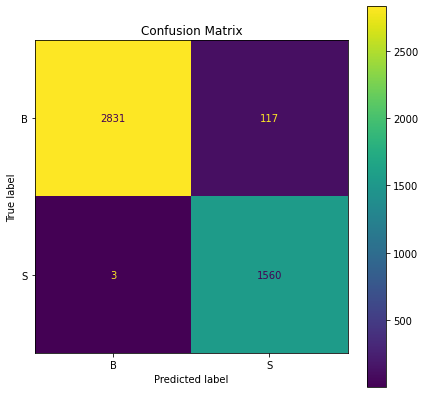

In [21]:
classes = ["B","S"]
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


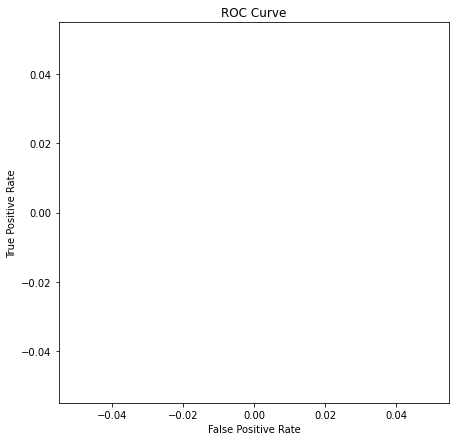

AUC: 0.9973571408432153


In [22]:
# Fit a random forest model
fig, ax = plt.subplots(figsize=(7,7))
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs,pos_label=1)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

In [23]:
clf = RandomForestClassifier()
clf.fit(X, y)

# Make predictions on test data
y_pred_proba = clf.predict_proba(X)

# Calculate log loss
log_loss_value = log_loss(y, y_pred_proba[:, 1])
print("Log Loss:", log_loss_value)

Log Loss: 0.03182544420369312
